In [1]:
import math
import os
import random

import tifffile
import numpy as np
import cv2
from patchify import patchify
import matplotlib.pyplot as plt

from read_roi import read_roi_zip
from tensorflow.keras.utils import Progbar


In [2]:
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

In [26]:
enface_c1_folder = "../jupyter_data/all/enface/batch2/Giantin_c1"
enface_c2_folder = "../jupyter_data/all/enface/batch2/Giantin_c2"
enface_c3_folder = "../jupyter_data/all/enface/batch2/Giantin_c3"
enfaceSideview_c1_folder = "../jupyter_data/all/enface_sideview/batch2/Giantin_c1"
enfaceSideview_c2_folder = "../jupyter_data/all/enface_sideview/batch2/Giantin_c2"
enfaceSideview_c3_folder = "../jupyter_data/all/enface_sideview/batch2/Giantin_c3"

enface_folder_list = [enface_c1_folder, enface_c2_folder, enface_c3_folder]
enfaceSideview_list = [enfaceSideview_c1_folder, enfaceSideview_c2_folder, enfaceSideview_c3_folder]

In [14]:
'''
# Delete modeling folder

import shutil

for folder in enfaceSideview_list:
    image_id_list = os.listdir(folder)
    for image_num, image_id in enumerate(image_id_list):
        image_id_path = os.path.join(folder, image_id)
        modeling_folder = os.path.join(image_id_path, "modeling")
        if os.path.exists(modeling_folder):
            shutil.rmtree(modeling_folder)
            print("Detete sucessfully.")

        file_list = os.listdir(image_id_path)
        if len(file_list) != 2:
            print("Number of files in {} is not 2.".format(image_id_path))
'''

In [4]:
%load_ext autoreload
%autoreload 2

In [ ]:
from jupyter_src.functions import select_roi

# 遍历每个 enface giantin folder
enface_folder_roi_list = []
enface_id_list = []
for folder_num, giantin_folder in enumerate(enface_folder_list):
    image_id_list = os.listdir(giantin_folder)
    image_roi_list = []
    for image_num, image_id in enumerate(image_id_list):
        enface_id_list.append(image_id)
        image_roi_dict = {}
        image_id_path = os.path.join(giantin_folder, image_id)
        file_list = os.listdir(image_id_path)
        if len(file_list) != 2:
            print("Folder [{}] doesn't have 2 files.".format(image_id_path))
            continue
        file_list = [os.path.join(image_id_path, file) for file in file_list]
        if file_list[0].endswith("tif"):
            tif_path, roi_path = file_list
        else:
            roi_path, tif_path = file_list

        giantin_channel = int(giantin_folder[-1]) - 1
        golgi_image = tifffile.imread(tif_path)
        giantin_tif = golgi_image[giantin_channel]
        roi_coords, accept_roi, reject_roi = select_roi(folder_num, image_num, roi_path, giantin_tif, show_plt=False,
                                                        has_sideview=False)
        image_roi_dict["giantin_tif"] = giantin_tif
        image_roi_dict["roi_coords"] = roi_coords
        image_roi_dict["accept_roi"] = accept_roi
        image_roi_dict["reject_roi"] = reject_roi
        print(image_id_path)
        image_roi_list.append(image_roi_dict)
    enface_folder_roi_list.append(image_roi_list)

In [ ]:
from jupyter_src.functions import select_roi

# 遍历每个enfaceSideview giantin folder
enfaceSideview_folder_roi_list = []
enfaceSideview_id_list = []
for folder_num, giantin_folder in enumerate(enfaceSideview_list):
    image_id_list = os.listdir(giantin_folder)
    image_roi_list = []
    for image_num, image_id in enumerate(image_id_list):
        enfaceSideview_id_list.append(image_id)
        image_roi_dict = {}
        image_id_path = os.path.join(giantin_folder, image_id)
        file_list = os.listdir(image_id_path)
        if len(file_list) != 2:
            print("Folder [{}] doesn't have 2 files.".format(image_id_path))
            continue
        file_list = [os.path.join(image_id_path, file) for file in file_list]
        if file_list[0].endswith("tif"):
            tif_path, roi_path = file_list
        else:
            roi_path, tif_path = file_list

        giantin_channel = int(giantin_folder[-1]) - 1
        golgi_image = tifffile.imread(tif_path)
        giantin_tif = golgi_image[giantin_channel]
        roi_coords, accept_roi, reject_roi = select_roi(folder_num, image_num, roi_path, giantin_tif, show_plt=False,
                                                        has_sideview=False)
        image_roi_dict["giantin_tif"] = giantin_tif
        image_roi_dict["roi_coords"] = roi_coords
        image_roi_dict["accept_roi"] = accept_roi
        image_roi_dict["reject_roi"] = reject_roi
        print(image_id_path)
        image_roi_list.append(image_roi_dict)
    enfaceSideview_folder_roi_list.append(image_roi_list)


In [29]:
from functions import filter_roi

# filter enface folder
enface_accept_list =  [[0, 0, [5, 8]], [0, 1, [1]], [0, 2, [6, 13]], [0, 4, [1, 10]], [0, 5, [0, 3, 7, 16, 21]],
                      [0, 6, [2, 7, 8]], [0, 9, [1, 2, 4, 5]], [0, 10, [6, 8]], [0, 15, [3]], [0, 16, [3, 4]],
                      [0, 20, [5, 9, 11, 12]], [0, 22, [14]], [0, 27, [1, 2]], [0, 28, [0, 3]], [0, 31, [5, 9]],
                      [0, 33, [5, 6]], [0, 35, [1, 7]], [0, 37, [7]], [0, 41, [5]], [0, 42, [3, 4, 5]], [1, 0, [2, 5]],
                      [1, 1, [1, 11]], [1, 2, [11]], [1, 4, [4]], [1, 5, [13, 14]]]

filtered_enface_folder_roi_list = filter_roi(enface_folder_roi_list, num_lists=enface_accept_list, accept_flag=True)
print("enface_accept finished")


[0,20,9] reject is None
enface_accept finished


In [30]:
from functions import filter_roi

# filter enface folder
enface_reject_list = [[0, 6, [12]], [0, 11, [3]], [0, 27, [11]], [0, 36, [6]], [0, 41, [6]], [1, 2, [6]]]

filtered_enface_folder_roi_list = filter_roi(filtered_enface_folder_roi_list, num_lists=enface_reject_list,
                                             accept_flag=False)
print("enface_reject finished")

enface_reject finished


In [31]:
from functions import filter_roi

# filter enfaceSideview folder
encafeSideview_accept_list =  [[0, 0, [4, 5]], [0, 1, [0]], [0, 2, [3]], [0, 3, [2, 16]], [0, 4, [0, 1, 5, 11]],
                              [0, 5, [7]], [0, 7, [0, 1, 3, 4]], [1, 0, [3]], [1, 1, [33, 35]], [1, 3, [12, 13, 25]],
                              [1, 4, [0, 5, 6, 7, 13]], [1, 6, [11, 28]], [1, 7, [3, 7, 12]], [1, 8, [4, 19]],
                              [1, 9, [8]], [1, 10, [18, 25, 35]], [1, 11, [0, 4, 7, 14, 15, 17]], [1, 12, [2, 3, 16]],
                              [1, 13, [12]], [1, 16, [4, 5]], [1, 18, [1]], [1, 20, [3, 4]], [1, 21, [10]],
                              [1, 27, [14]], [1, 28, [0, 2, 7]], [1, 33, [0]], [1, 35, [4]], [1, 37, [13]],
                              [1, 38, [4, 6, 12, 13, 28]], [1, 41, [6]], [1, 43, [2]], [1, 44, [7]], [2, 0, [16]]]
filtered_enfaceSideview_folder_roi_list = filter_roi(enfaceSideview_folder_roi_list,
                                                     num_lists=encafeSideview_accept_list, accept_flag=True)
print("enfaceSideview_accept finished")

[1,3,25] reject is None
[1,7,7] reject is None
enfaceSideview_accept finished


In [32]:
from functions import filter_roi

encafeSideview_reject_list = [[0, 1, [6]], [0, 3, [21, 32]], [0, 5, [9]], [0, 7, [10, 19, 25, 28]], [1, 0, [14]],
                              [1, 1, [16, 36, 51]], [1, 2, [4]], [1, 4, [14]], [1, 6, [12]], [1, 7, [8]],
                              [1, 8, [21, 22]], [1, 9, [16]], [1, 13, [19, 22, 24]], [1, 14, [12, 17, 18]],
                              [1, 16, [12]], [1, 17, [0, 4, 21]], [1, 18, [7]], [1, 19, [9, 12, 14, 16]], [1, 21, [15]],
                              [1, 23, [8]], [1, 24, [6, 13, 15, 16, 18, 19, 20]], [1, 25, [14]], [1, 27, [17, 19]],
                              [1, 28, [28, 32]], [1, 29, [2, 13, 15]], [1, 30, [6, 7, 8]], [1, 32, [14]],
                              [1, 33, [11, 15, 16]], [1, 34, [7]], [1, 38, [20]], [1, 39, [18, 22]], [1, 41, [12]],
                              [1, 42, [6, 7, 10]], [1, 43, [6, 7, 8, 9, 10, 11, 12, 13]], [1, 44, [10]]]
# filter enfaceSideview folder

filtered_enfaceSideview_folder_roi_list = filter_roi(
    filtered_enfaceSideview_folder_roi_list,
    num_lists=encafeSideview_reject_list, accept_flag=False)
print("enfaceSideview_reject finished")

enfaceSideview_reject finished


In [40]:
# get giantin and mask from folder list

from functions import roiList_to_mask

# enface
enface_giantin_list, enface_mask_list = roiList_to_mask(filtered_enface_folder_roi_list)
# enfaceSideview
enfaceSideview_giantin_list, enfaceSideview_mask_list = roiList_to_mask(filtered_enfaceSideview_folder_roi_list)

print("roiList_to_mask finished")

roiList_to_mask finished


In [41]:
# padding and patchify giantin and mask list

from functions import padding_image

padded_enface_giantin_list, patches_enface_giantin_list = padding_image(enface_giantin_list, do_patchify=True,
                                                                        clear_edge_roi=False, patch_size=(256, 256),
                                                                        patch_step=206)

padded_enface_mask_list, patches_enface_mask_list = padding_image(enface_mask_list, do_patchify=True,
                                                                  clear_edge_roi=True, patch_size=(256, 256),
                                                                  patch_step=206)

padded_enfaceSideview_giantin_list, patches_enfaceSideview_giantin_list = padding_image(enfaceSideview_giantin_list,
                                                                                        do_patchify=True,
                                                                                        clear_edge_roi=False,
                                                                                        patch_size=(256, 256),
                                                                                        patch_step=206)

padded_enfaceSideview_mask_list, patches_enfaceSideview_mask_list = padding_image(enfaceSideview_mask_list,
                                                                                  do_patchify=True, clear_edge_roi=True,
                                                                                  patch_size=(256, 256), patch_step=206)

print("padding_image finished")

668
874
668
668
874
874
874
462
874
462
874
668
668
668
668
668
462
668
462
874
1080
1080
1080
1286
1080
1080
1080
874
1080
462
1080
1080
1492
1286
1080
874
1080
1080
1080
874
874
874
1080
874
874
874
874
462
874
874
668
874
668
668
874
874
874
462
874
462
874
668
668
668
668
668
462
668
462
874
1080
1080
1080
1286
1080
1080
1080
874
1080
462
1080
1080
1492
1286
1080
874
1080
1080
1080
874
874
874
1080
874
874
874
874
462
874
874
462
668
874
1080
874
874
874
1080
668
668
668
874
668
668
874
1080
874
874
874
874
874
874
874
1080
1080
874
874
874
874
1080
1080
874
1080
874
1080
1080
1080
1080
1080
874
874
1080
668
1080
1080
1080
1080
874
668
874
1080
874
1080
668
462
668
874
1080
874
874
874
1080
668
668
668
874
668
668
874
1080
874
874
874
874
874
874
874
1080
1080
874
874
874
874
1080
1080
874
1080
874
1080
1080
1080
1080
1080
874
874
1080
668
1080
1080
1080
1080
874
668
874
1080
874
1080
668
padding_image finished


20181001-HeLa-Giantin-647-mCherryG84-ACBD3-GFP-Noc-02
5 10


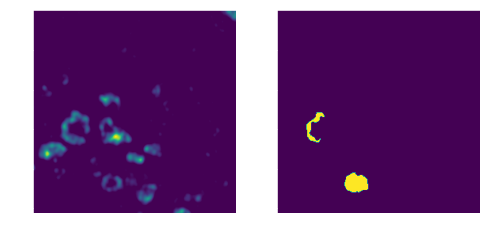

In [14]:
# After correct function padding_image()
i = 5
print(enface_id_list[i])
j = 10
print(i, j)
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(patches_enface_giantin_list[i][j])
plt.subplot(122)
plt.imshow(patches_enface_mask_list[i][j])
plt.show()

20181001-HeLa-Giantin-647-mCherryG84-ACBD3-GFP-Noc-02
5 10


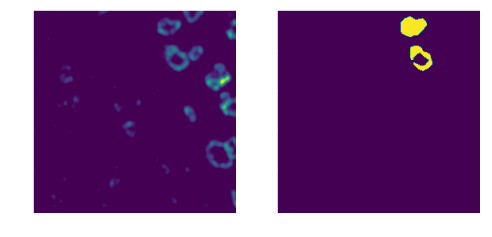

In [24]:
# show patches randomly
import random

i = random.randint(0, len(patches_enface_giantin_list) - 1)
i = 5
print(enface_id_list[i])
j = random.randint(0, len(patches_enface_giantin_list[i]) - 1)
j = 10
print(i, j)
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(patches_enface_giantin_list[i][j])
plt.subplot(122)
plt.imshow(patches_enface_mask_list[i][j])
plt.show()

In [ ]:
from TFRecord_func import data_to_TFRecord

enface_tfrecord_path = "../jupyter_data/tfrecord_new/enface/batch2"
data_to_TFRecord(enface_id_list, patches_enface_giantin_list, patches_enface_mask_list, enface_tfrecord_path)

In [ ]:
from TFRecord_func import data_to_TFRecord

enfacesideview_tfrecord_path = "../jupyter_data/tfrecord_new/enfaceSideview/batch2"
data_to_TFRecord(enfaceSideview_id_list, patches_enfaceSideview_giantin_list, patches_enfaceSideview_mask_list,
                 enfacesideview_tfrecord_path)

In [28]:
# get data from tfrecord
from TFRecord_func import TFRecord_to_data

enface_tf_images, enface_tf_masks, enface_tf_ids = TFRecord_to_data(enface_tfrecord_path)
enfaceSideview_tf_images, enfaceSideview_tf_masks, enfaceSideview_tf_ids = TFRecord_to_data(
    enfacesideview_tfrecord_path)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
25/27 [==========================>...] - ETA: 0s

20181001-HeLa-Giantin-647-GPP130-mCherry-tpcqh-GFP-Noc-01
20181001-HeLa-Giantin-647-GPP130-mCherry-tpcqh-GFP-Noc-01
2 4


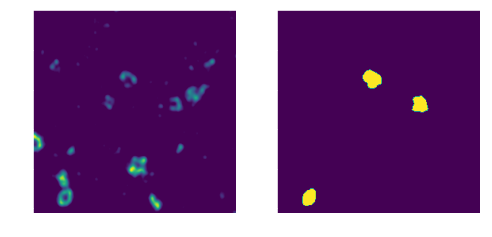

uint16
bool


In [30]:
import random

i = random.randint(0, len(enface_tf_images) - 1)
print(enface_id_list[i])
print(enface_tf_ids[i])
j = random.randint(0, len(enface_tf_images[i]) - 1)
print(i, j)
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(enface_tf_images[i][j])
plt.subplot(122)
plt.imshow(enface_tf_masks[i][j])
plt.show()

print(enface_tf_images[i][j].dtype)
print(enface_tf_masks[i][j].dtype)


In [ ]:
import random

i = random.randint(0, len(enface_tf_images) - 1)
i = 5
print(enface_id_list[i])
print(enface_tf_ids[i])
j = random.randint(0, len(enface_tf_images[i]) - 1)
j = 21
print(i, j)
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(enface_tf_images[i][j])
plt.subplot(122)
plt.imshow(enface_tf_masks[i][j])
plt.show()

print(enface_tf_images[i][j].dtype)
print(enface_tf_masks[i][j].dtype)